In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [227]:
df = pd.read_csv('FinTech Data.csv')
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [228]:
df['savings_balance'].unique()
df['employment_duration'].unique()

array(['> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed',
       '< 1 year'], dtype=object)

In [229]:
df['savings_balance'].value_counts()
df['employment_duration'].value_counts()

,count
employment_duration,
1 - 4 years,339
> 7 years,253
4 - 7 years,174
< 1 year,172
unemployed,62


In [230]:
#one hot encoding using OneHotEncoder of Scikit-Learn

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")


Encoded Employee data : 
     months_loan_duration  amount  percent_of_income  years_at_residence  age  \
0                       6    1169                  4                   4   67   
1                      48    5951                  2                   2   22   
2                      12    2096                  2                   3   49   
3                      42    7882                  2                   4   45   
4                      24    4870                  3                   4   53   
..                    ...     ...                ...                 ...  ...   
995                    12    1736                  3                   4   31   
996                    30    3857                  4                   4   40   
997                    12     804                  4                   4   38   
998                    45    1845                  4                   4   23   
999                    45    4576                  3                   4   27   

  

In [407]:
fintech_data_x = df_encoded.iloc[:,0:3]
# Standardize the data
from sklearn.preprocessing import MinMaxScaler # Z = (x-u)/sigma
min_max_scaler = MinMaxScaler()
fintech_data_z = min_max_scaler.fit_transform(fintech_data_x)
fintech_data_z

array([[0.02941176, 0.05056674, 1.        ],
       [0.64705882, 0.31368989, 0.33333333],
       [0.11764706, 0.10157368, 0.33333333],
       ...,
       [0.11764706, 0.03048311, 1.        ],
       [0.60294118, 0.08776274, 1.        ],
       [0.60294118, 0.23803235, 0.66666667]])

In [383]:
cluster_range = range( 2, 10)
cluster_errors = [] # distance between center of cluster and all points inside the cluster

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters)
  clusters.fit(fintech_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

,num_clusters,cluster_errors
0,2,76.452200
1,3,59.123690
2,4,45.168063
3,5,34.338881
4,6,26.537033
5,7,22.889828
6,8,20.452956
7,9,18.642478


In [385]:
import plotly.express as px

fig = px.line(clusters_df, x="num_clusters", y="cluster_errors", title='Elbow Method For Optimal k')
fig.show()

In [386]:
cluster = KMeans( n_clusters = 2, random_state = 1 )
cluster.fit(fintech_data_z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=1)

In [387]:
prediction=cluster.predict(fintech_data_z) # Is to predict in which cluster each wine will go

In [388]:
# prompt: label encode the default column into 0 and 1

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['default'] = label_encoder.fit_transform(df['default'])

In [389]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,prediction
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,0,1
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,1,0
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,0,1
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,0,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,0,0
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,0,0
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,0,0
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,1,0


In [390]:
df['default']

,default
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,1


In [391]:
prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,

In [392]:
df['prediction'] = prediction
from google.colab import files
df.to_csv('FinTech_Data_Prediction.csv', encoding = 'utf-8-sig')
files.download('FinTech_Data_Prediction.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

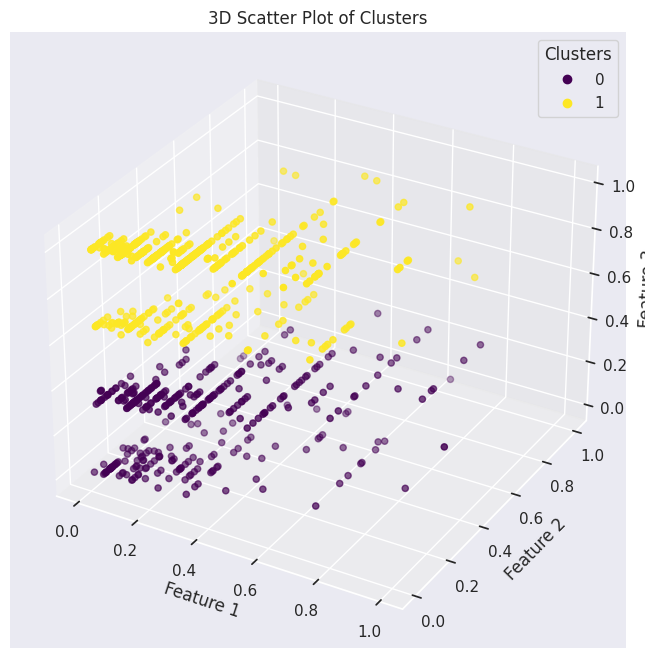

In [395]:
# prompt: plot a 3d scatter using matplotlib

import matplotlib.pyplot as plt
# Assuming 'fintech_data_z' is a NumPy array with shape (n_samples, 3)
# and 'prediction' contains the cluster labels

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
scatter = ax.scatter(fintech_data_z[:, 0], fintech_data_z[:, 1], fintech_data_z[:, 2], c=prediction, cmap='viridis')

# Customize the plot (optional)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Clusters')

# Add a legend (optional)
plt.legend(*scatter.legend_elements(), title='Clusters')

plt.show()


In [411]:
from re import X


# Assuming 'fintech_data_z' is a NumPy array with shape (n_samples, 3)
# and 'prediction' contains the cluster labels

import plotly.express as px

fig = px.scatter_3d(
    x=fintech_data_z[:, 0],
    y=fintech_data_z[:, 1],
    z=fintech_data_z[:, 2],
    color=prediction,
    color_continuous_scale='picnic',  # Use the 'Blues' color scale
    title='3D Scatter Plot of Clusters (Plotly)'
)

fig.show()


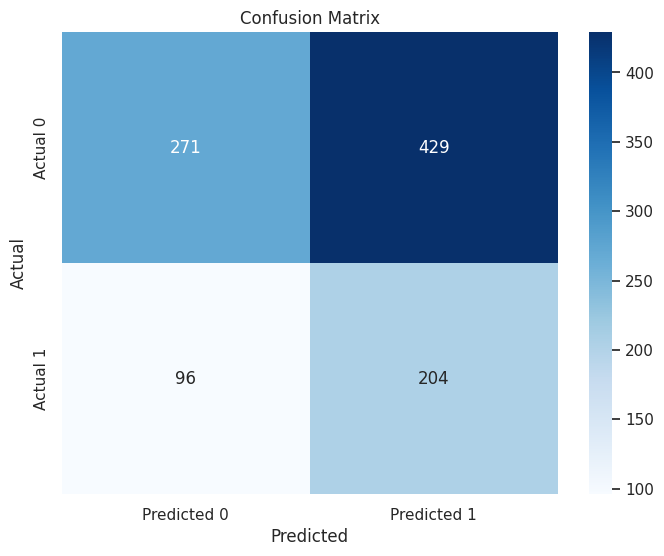

In [401]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'df' is your DataFrame with 'default' and 'prediction' columns
conf_matrix = confusion_matrix(df['default'], df['prediction'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
